In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Read the csv file into a pandas DataFrame

vaccine = pd.read_csv('../Resources/vaccine-preventable-disease-cases-by-county-and-year-3.csv')
vaccine.head()

,disease,county,year,count
0,Diphtheria,Alameda,2001,0
1,Diphtheria,Alameda,2002,0
2,Diphtheria,Alameda,2003,0
3,Diphtheria,Alameda,2004,0
4,Diphtheria,Alameda,2005,0


In [13]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
vaccine = pd.get_dummies(vaccine)
vaccine.head()
### END SOLUTION

,year,count,disease_Diphtheria,disease_Hepatitis A,"disease_Hepatitis B, Acute","disease_Hepatitis C, Acute",disease_Invasive Meningococcal Disease,disease_Measles,disease_Mumps,disease_Pertussis,...,county_Sonoma,county_Stanislaus,county_Sutter,county_Tehama,county_Trinity,county_Tulare,county_Tuolumne,county_Ventura,county_Yolo,county_Yuba
0,2001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2002,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2003,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = vaccine[['year', 'disease_Diphtheria','disease_Hepatitis B, Acute','disease_Hepatitis C, Acute', 'disease_Invasive Meningococcal Disease', 'disease_Measles', 'disease_Mumps', 'disease_Pertussis', 
             'county_Sonoma','county_Stanislaus','county_Sutter', 'county_Tehama', 'county_Trinity', 'county_Tuolumne',
            'county_Ventura', 'county_Yolo', 'county_Yuba']]
y = vaccine ["count"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(7670, 17) (7670, 1)


In [20]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

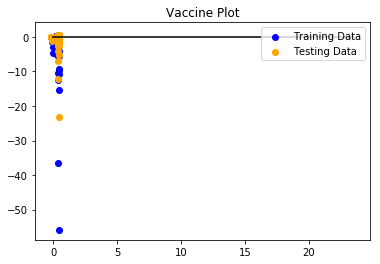

In [24]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Vaccine Plot")
plt.show()
### END SOLUTION

In [25]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45374805914384225, R2: 0.047577963568513515


In [26]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4548128998439912, R2: 0.04534285153293893


In [27]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.4537480617221288, R2: 0.04757795815666244


In [29]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45426301515544526, R2: 0.046497065384245695
